**Выбор локации для скважины**

**Задачи:**

1. определить место разработки скважины для нефтедобывающей компании.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import random
import seaborn as sns
from scipy import stats as st
from sklearn.linear_model import (
    LinearRegression
)

from sklearn.model_selection import (
    train_test_split
)

from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import (
    MinMaxScaler,
    FunctionTransformer
)

from sklearn.metrics import ( 
    mean_squared_error
)

import warnings
from imblearn.combine import SMOTETomek

from phik import phik_matrix
from phik.report import plot_correlation_matrix

# вывод всех столбцов и строк, независимо от их количества.
pd.set_option('display.max_columns', None)

# отключаем предупреждение
pd.options.mode.chained_assignment = None
warnings.simplefilter(action='ignore', category=FutureWarning)

# Загрузим и подготовим данные.

## Исследовательский анализ данных

Исследовательский анализ данных (Exploratory Data Analysis, EDA) — является важным этапом в аналитике, который позволяет лучше понять данные и выявить основные характеристики и закономерности. 

В представленных данных есть следующие признаки: целевые (прогнозируемые) и входные (прогнозирующие) признаки.

Целевой количественный:
- product

Входной количественный:
- f0, f1, f2

### Загрузка данных

In [2]:
try:
    geo_data_0 = pd.read_csv(
        r'...\geo_data_0.csv')
    geo_data_1 = pd.read_csv(
        r'...\geo_data_1.csv')
    geo_data_2 = pd.read_csv(
        r'...\geo_data_2.csv')
    
except:
    geo_data_0 = pd.read_csv('.../geo_data_0.csv')
    geo_data_1 = pd.read_csv('.../geo_data_1.csv')
    geo_data_2 = pd.read_csv('.../geo_data_2.csv')

Выведем первые строки каждого набора данных

In [3]:
display(geo_data_0.head())

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [4]:
display(geo_data_1.head())

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


In [5]:
display(geo_data_2.head())

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


### Предобработка данных

Подготовка данных для анализа называется предобработкой. Нужно оценить масштаб найденных проблем и устранить их. Предобработка следует принципу GIGO (от англ. garbage in — garbage out, буквально «мусор на входе — мусор на выходе»). Это значит, что при ошибках во входных данных даже правильный алгоритм работы приведёт к неверным результатам. Так же нужно помнить об законе экономии, который называется Бри́тва О́ккама. В нем говорится следующее: Не следует множить сущее без необходимости. Суть принципа: совершенство должно быть простым. Если какого-то результата можно достичь с привлечением сущностей A, B и C либо другим путём с привлечением A, B, С и D — надо выбирать первый путь. В плане программирования это значит, что не следут создавать промежуточные переменные, которые не пригодяться в дальнейшем.

#### Соответствие техническому описанию

Для этой задачи заказчик предоставил данные с признаками:

- id — уникальный идентификатор скважины;
- f0, f1, f2 — три признака точек (неважно, что они означают, но сами признаки значимы);
- product — объём запасов в скважине (тыс. баррелей) целевой признак

In [6]:
geo_data_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [7]:
geo_data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [8]:
geo_data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


Таблицы соответствуют техническому описанию

#### Дубликаты

**geo_data_0**

In [9]:
geo_data_0[geo_data_0['id'].duplicated(keep=False)].sort_values(by='id')

,id,f0,f1,f2,product
66136,74z30,1.084962,-0.312358,6.990771,127.643327
64022,74z30,0.741456,0.459229,5.153109,140.771492
51970,A5aEY,-0.180335,0.935548,-2.094773,33.020205
3389,A5aEY,-0.039949,0.156872,0.209861,89.249364
69163,AGS9W,-0.933795,0.116194,-3.655896,19.230453
42529,AGS9W,1.454747,-0.479651,0.683380,126.370504
931,HZww2,0.755284,0.368511,1.863211,30.681774
7530,HZww2,1.061194,-0.373969,10.430210,158.828695
63593,QcMuo,0.635635,-0.473422,0.862670,64.578675
1949,QcMuo,0.506563,-0.323775,-2.215583,75.496502


Присутствуют явные дубликаты, обработаем с помощью пайплайна в шаге подготовки данных

**geo_data_1**

In [10]:
geo_data_1[geo_data_1['id'].duplicated(keep=False)].sort_values(by='id')

,id,f0,f1,f2,product
5849,5ltQ6,-3.435401,-12.296043,1.999796,57.085625
84461,5ltQ6,18.213839,2.191999,3.993869,107.813044
1305,LHZR0,11.170835,-1.945066,3.002872,80.859783
41906,LHZR0,-8.989672,-4.286607,2.009139,57.085625
2721,bfPNe,-9.494442,-5.463692,4.006042,110.992147
82178,bfPNe,-6.202799,-4.820045,2.995107,84.038886
47591,wt4Uk,-9.091098,-8.109279,-0.002314,3.179103
82873,wt4Uk,10.259972,-9.376355,4.994297,134.766305


Присутствуют явные дубликаты, обработаем с помощью пайплайна в шаге подготовки данных

**geo_data_2**

In [11]:
geo_data_2[geo_data_2['id'].duplicated(keep=False)].sort_values(by='id')

,id,f0,f1,f2,product
45404,KUPhW,0.231846,-1.698941,4.990775,11.716299
55967,KUPhW,1.211150,3.176408,5.543540,132.831802
11449,VF7Jo,2.122656,-0.858275,5.746001,181.716817
49564,VF7Jo,-0.883115,0.560537,0.723601,136.233420
44378,Vcm5J,-1.229484,-2.439204,1.222909,137.968290
95090,Vcm5J,2.587702,1.986875,2.482245,92.327572
28039,xCHr8,1.633027,0.368135,-2.378367,6.120525
43233,xCHr8,-0.847066,2.101796,5.597130,184.388641


Присутствуют явные дубликаты, обработаем с помощью пайплайна в шаге подготовки данных

### Статистический анализ

**geo_data_0**

In [12]:
# сводная таблица числовых признаков
(
    geo_data_0
    .select_dtypes(include='number')
    .apply(['count', 'std', 'min', 'mean', 'median', 'sum', 'max']) 
    .style.format('{:,.2f}')
)

,f0,f1,f2,product
count,"100,000.00","100,000.00","100,000.00","100,000.00"
std,0.87,0.50,3.25,44.29
min,-1.41,-0.85,-12.09,0.00
mean,0.50,0.25,2.50,92.50
median,0.50,0.25,2.52,91.85
sum,"50,041.93","25,014.30","250,264.69","9,250,000.00"
max,2.36,1.34,16.00,185.36


Присутствуют нулевые значения в столбце **product**, необходимо рассмотреть подробнее

In [13]:
# количество очень низких значений
len(geo_data_0.query('product < 0.1'))

26

Фильтруем выбросы с помощью пайплайна в шаге подготовки данных

**geo_data_1**

In [14]:
# сводная таблица числовых признаков
(
    geo_data_1
    .select_dtypes(include='number')
    .apply(['count', 'std', 'min', 'mean', 'median', 'sum', 'max']) 
    .style.format('{:,.2f}')
)

,f0,f1,f2,product
count,"100,000.00","100,000.00","100,000.00","100,000.00"
std,8.97,5.12,1.70,45.94
min,-31.61,-26.36,-0.02,0.00
mean,1.14,-4.80,2.49,68.83
median,1.15,-4.81,2.01,57.09
sum,"114,129.58","-479,657.91","249,454.13","6,882,500.00"
max,29.42,18.73,5.02,137.95


In [15]:
# количество очень низких значений
len(geo_data_1.query('product < 1'))

8235

Фильтруем выбросы с помощью пайплайна в шаге подготовки данных

**geo_data_2**

In [16]:
# сводная таблица числовых признаков
(
    geo_data_2
    .select_dtypes(include='number')
    .apply(['count', 'std', 'min', 'mean', 'median', 'sum', 'max']) 
    .style.format('{:,.2f}')
)

,f0,f1,f2,product
count,"100,000.00","100,000.00","100,000.00","100,000.00"
std,1.73,1.73,3.47,44.75
min,-8.76,-7.08,-11.97,0.00
mean,0.00,-0.00,2.50,95.00
median,0.01,-0.01,2.48,94.93
sum,202.27,-208.05,"249,512.76","9,500,000.00"
max,7.24,7.84,16.74,190.03


In [17]:
# количество очень низких значений
len(geo_data_2.query('product < 0.01'))

4

Фильтруем выбросы с помощью пайплайна в шаге подготовки данных

### Визуализация

In [18]:
# собственная функция
def hist_box_num_sub(data, x, title_hist, xlabel, ylabel):

    # создаем случайные цвета
    def random_color():
        return "#{:06x}".format(random.randint(0, 0xFFFFFF))
        
    # инициализация объекта Figure и создания подграфиков
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    
    # гистограмма
    sns.histplot(data=data, 
                 x=x,
                 ax=axes[0], 
                 color=random_color(),
                 kde=True,
                 multiple='stack'
                )
    # вертикальные линии
    mean = np.mean(data[x])
    median = np.median(data[x])

    # определяем верхнюю границу по оси Y на основе данных
    y_max = axes[0].get_ylim()[1] * 1 # можем адаптировать множитель
    
    # добавляем вертикальные линии
    axes[0].vlines(mean, 0, y_max, color='red', label='Среднее')
    axes[0].vlines(median, 0, y_max, color='blue', linestyle='--', label='Медиана')
    axes[0].set_title(title_hist,  fontsize=9)
    axes[0].set_xlabel(xlabel)
    axes[0].set_ylabel(ylabel)
    axes[0].legend()
    
    # boxplot
    sns.boxplot(data=data, 
                x=x,
                color=random_color(),
                ax=axes[1]
               )
    axes[1].set_title('Ящик с усами колическтвенного признака',  fontsize=9)
    axes[1].set_xlabel(xlabel)

    # показать графики
    plt.tight_layout()
    plt.show()

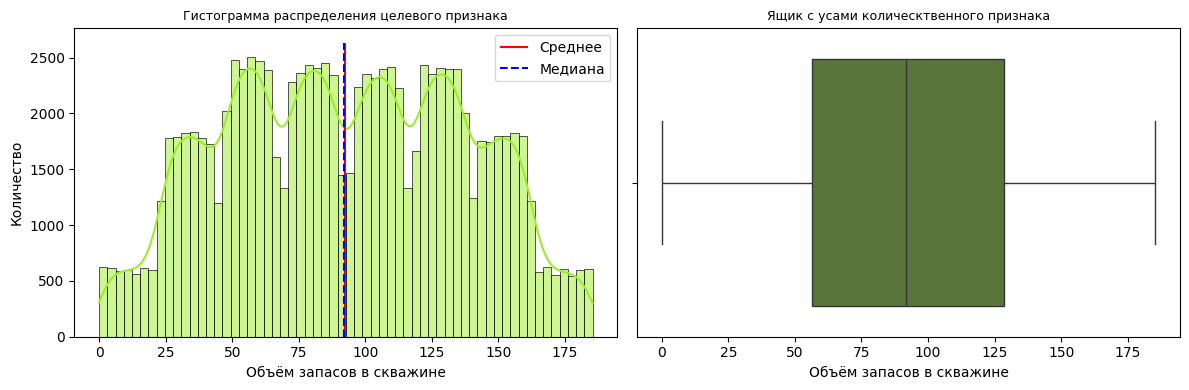

In [19]:
# geo_data_0 целевой признак
hist_box_num_sub(
    geo_data_0, 
    'product', 
    'Гистограмма распределения целевого признака', 
    'Объём запасов в скважине', 
    'Количество')

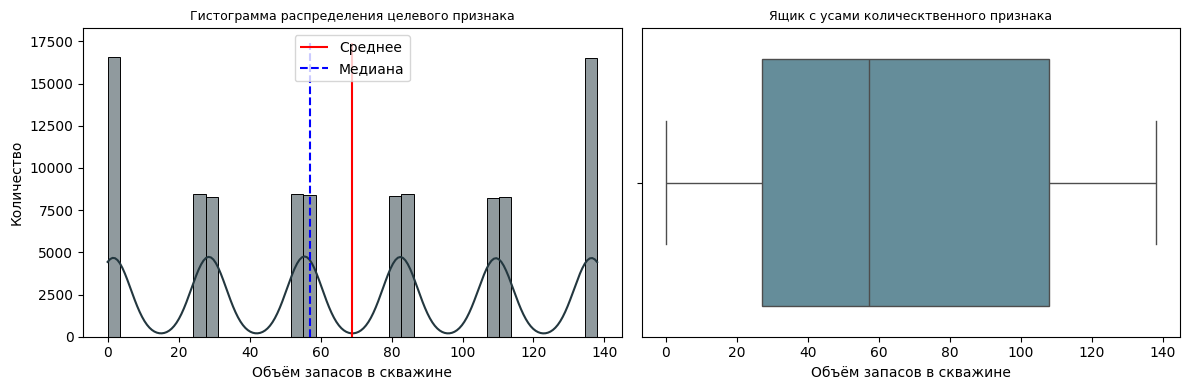

In [20]:
# geo_data_1 целевой признак
hist_box_num_sub(
    geo_data_1, 
    'product', 
    'Гистограмма распределения целевого признака', 
    'Объём запасов в скважине', 
    'Количество')

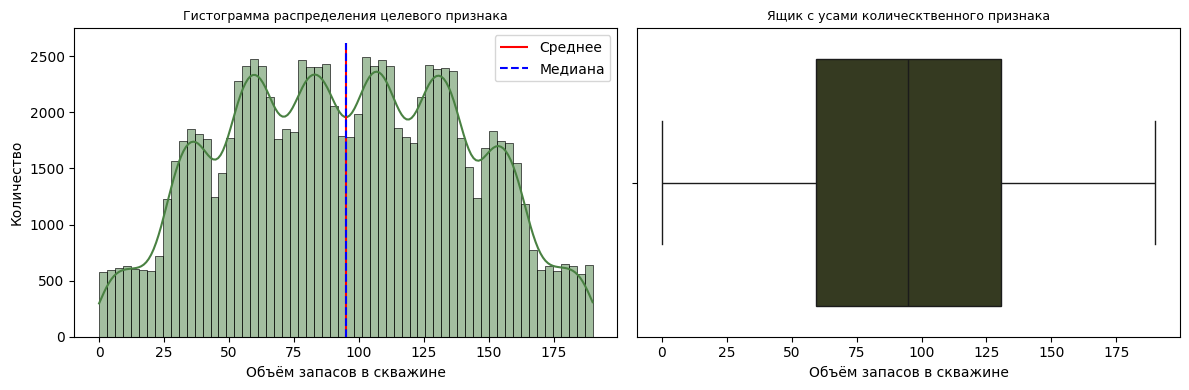

In [21]:
# geo_data_2 целевой признак
hist_box_num_sub(
    geo_data_2, 
    'product', 
    'Гистограмма распределения целевого признака', 
    'Объём запасов в скважине', 
    'Количество')

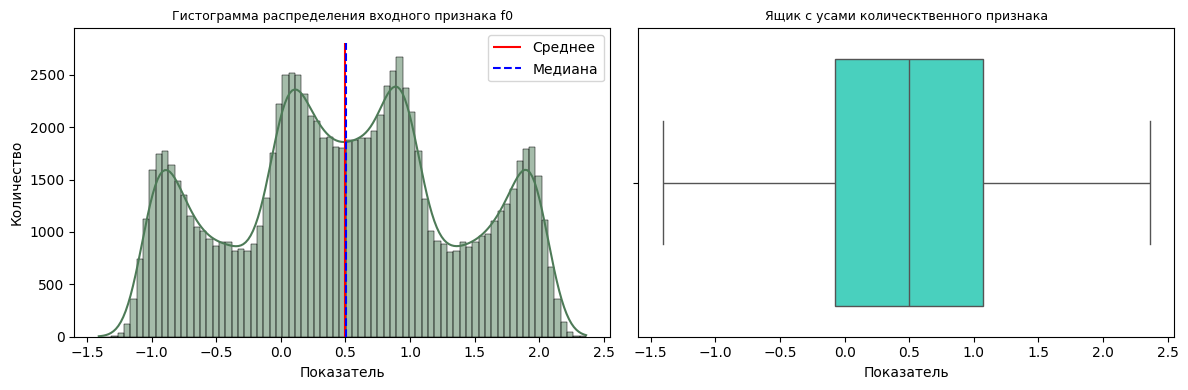

In [22]:
# geo_data_0, признак f0
hist_box_num_sub(
    geo_data_0, 
    'f0', 
    'Гистограмма распределения входного признака f0', 
    'Показатель', 
    'Количество')

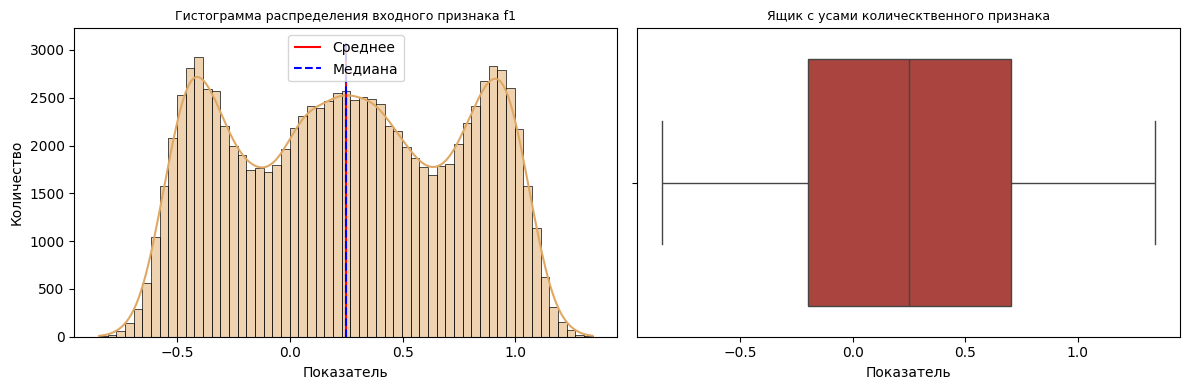

In [23]:
# geo_data_0, признак f1
hist_box_num_sub(
    geo_data_0, 
    'f1', 
    'Гистограмма распределения входного признака f1', 
    'Показатель', 
    'Количество')

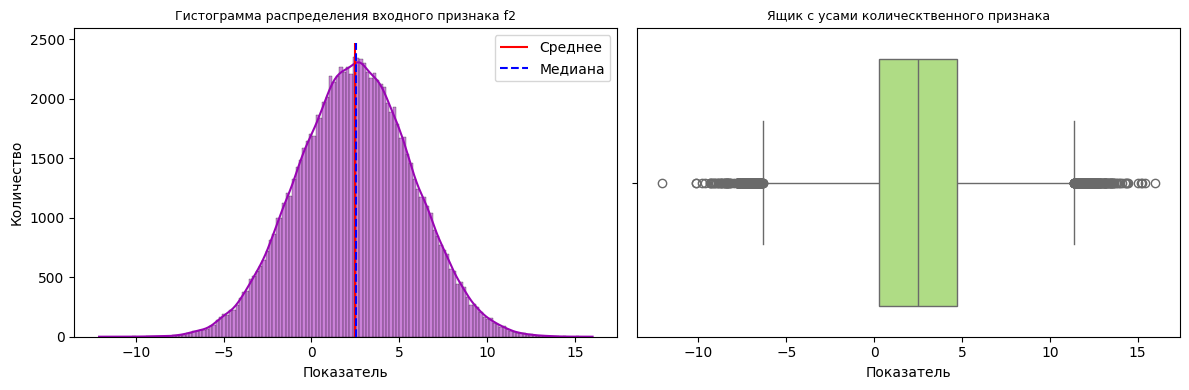

In [24]:
# geo_data_0, признак f2
hist_box_num_sub(
    geo_data_0, 
    'f2', 
    'Гистограмма распределения входного признака f2', 
    'Показатель', 
    'Количество')

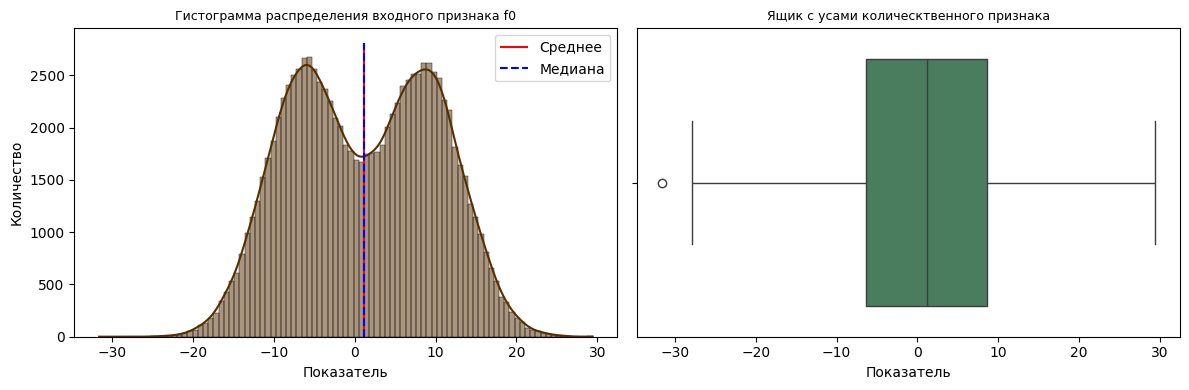

In [25]:
# geo_data_1, признак f0
hist_box_num_sub(
    geo_data_1, 
    'f0', 
    'Гистограмма распределения входного признака f0', 
    'Показатель', 
    'Количество')

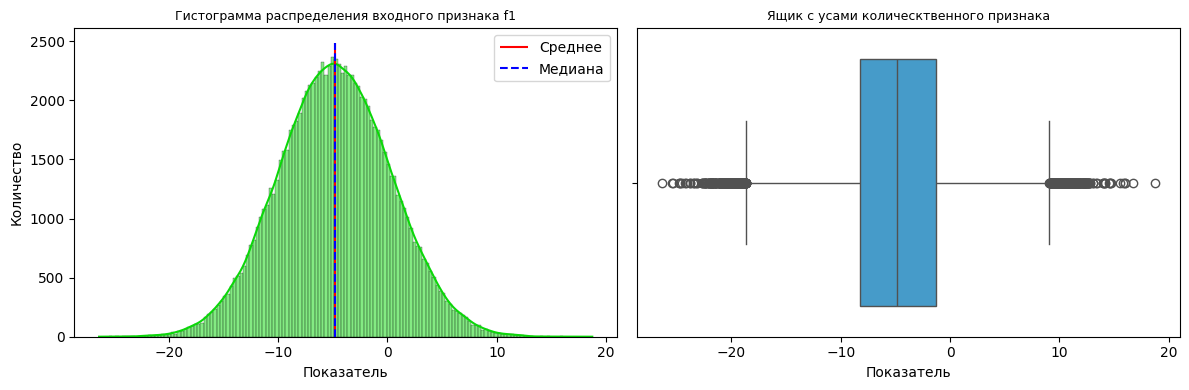

In [26]:
# geo_data_1, признак f1
hist_box_num_sub(
    geo_data_1, 
    'f1', 
    'Гистограмма распределения входного признака f1', 
    'Показатель', 
    'Количество')

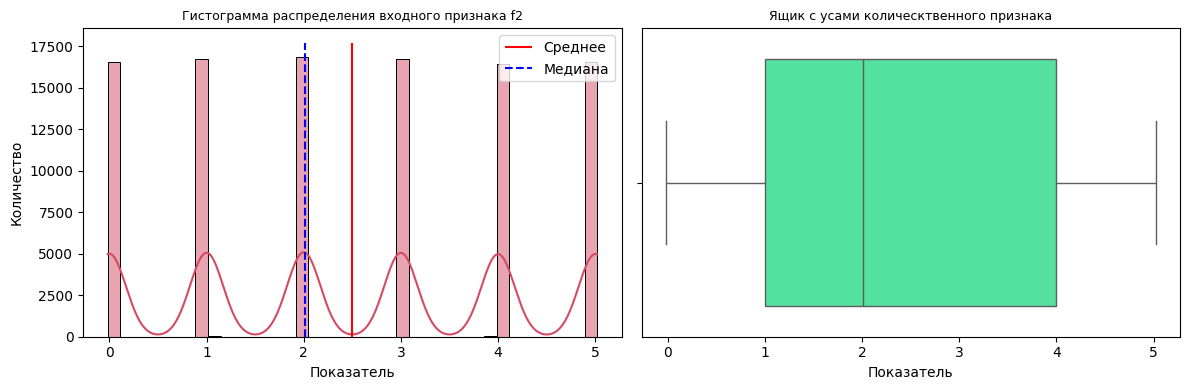

In [27]:
# geo_data_1, признак f2
hist_box_num_sub(
    geo_data_1, 
    'f2', 
    'Гистограмма распределения входного признака f2', 
    'Показатель', 
    'Количество')

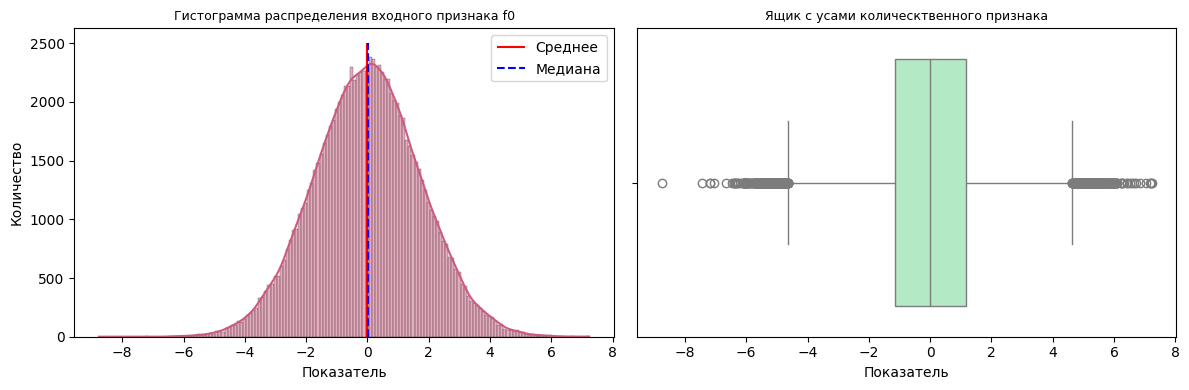

In [28]:
# geo_data_2, признак f0
hist_box_num_sub(
    geo_data_2, 
    'f0', 
    'Гистограмма распределения входного признака f0', 
    'Показатель', 
    'Количество')

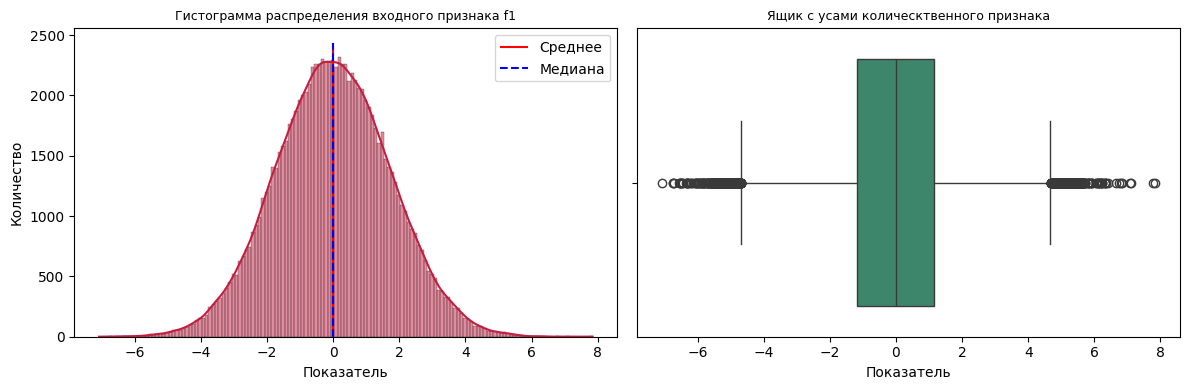

In [29]:
# geo_data_2, признак f1
hist_box_num_sub(
    geo_data_2, 
    'f1', 
    'Гистограмма распределения входного признака f1', 
    'Показатель', 
    'Количество')

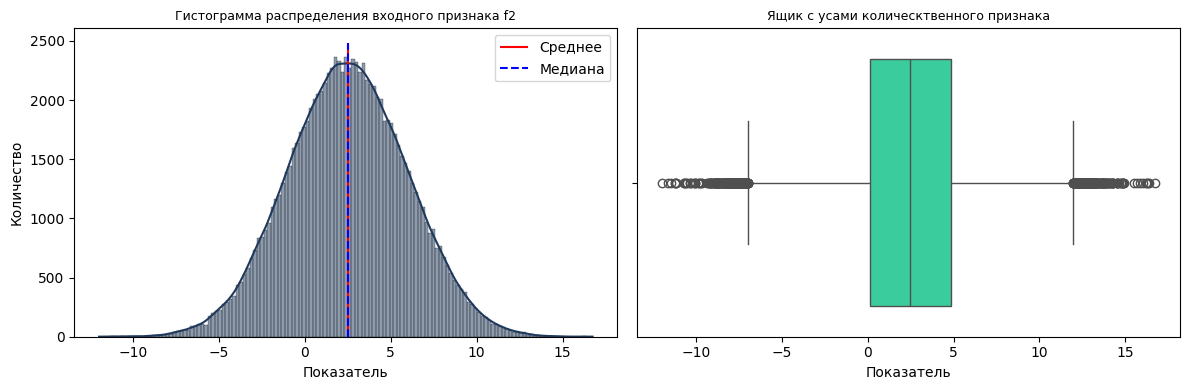

In [30]:
# geo_data_2, признак f2
hist_box_num_sub(
    geo_data_2, 
    'f2', 
    'Гистограмма распределения входного признака f2', 
    'Показатель', 
    'Количество')

Фильтруем выбросы в каждом фрейме с помощью пайплайна в шаге подготовки данных. Не все признаки имеют нормальное распределение, это повлияет на метод построения корреляционной матрицы.

### Корреляционный анализ

Построим диаграммы рассеяния для оценки потенциальной взаимосвязи между количественными переменными.

In [31]:
# список с названиями фреймов
geo_names = ['geo_0', 'geo_1', 'geo_2']

def pairplot_no_cat(datas, x_vars, y_vars, names):
    for i, j in zip(datas, names):
        pair_plot = sns.pairplot(
            i,
            x_vars=x_vars,
            y_vars=y_vars
            )
        pair_plot.fig.suptitle(f'Диаграмма рассеивания количественных признаков {j}', y = 1.05, ha='center')
        plt.show()

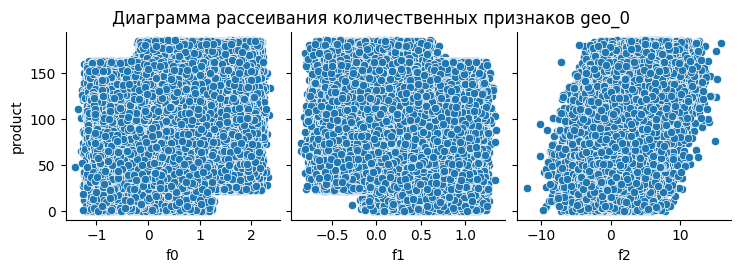

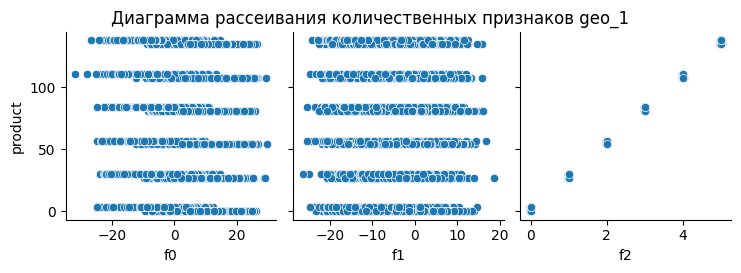

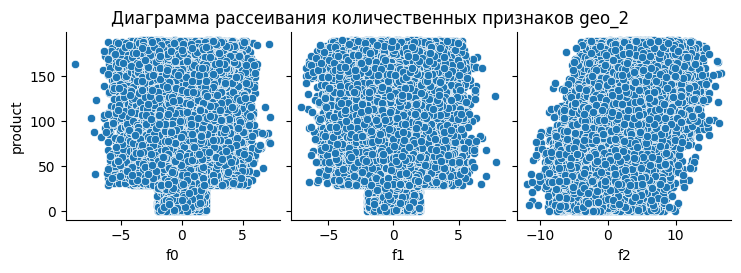

In [32]:
pairplot_no_cat(
    [geo_data_0, geo_data_1, geo_data_2], 
    ['f0', 'f1', 'f2'], 
    ['product'],
    geo_names
)

После построения диаграммы рассеяния ясно следующее:

- присутствует линейная корреляция в `geo_data_0` между `product -> f2`;
- присутствует линейная корреляция в `geo_data_1` между `product -> f2`;
- присутствует линейная корреляция в `geo_data_2` между `product -> f2`;
- остальные признаки без явной корреляции.

Построим матрицу корреляции.

In [33]:
def matrix_corr_no_cat(datas, int_cols, name):
    # считаем корреляцию
    for i, j in zip(datas, name):
        phik_overview = phik_matrix(
            i.drop(['id'], 
                   axis=1),
            interval_cols=int_cols
        ) 
        
        # размер матрицы
        print(f'Размер матрицы {phik_overview.shape}')
        plot_correlation_matrix(
            phik_overview.values,
            x_labels=phik_overview.columns,
            y_labels=phik_overview.index,
            vmin=0, vmax=1, color_map='coolwarm',
            title=f'Матрица корреляции $\phi_K$ {j}' ,
            fontsize_factor=1.5,
            figsize=(7, 6)
        )
        plt.show()

Размер матрицы (4, 4)


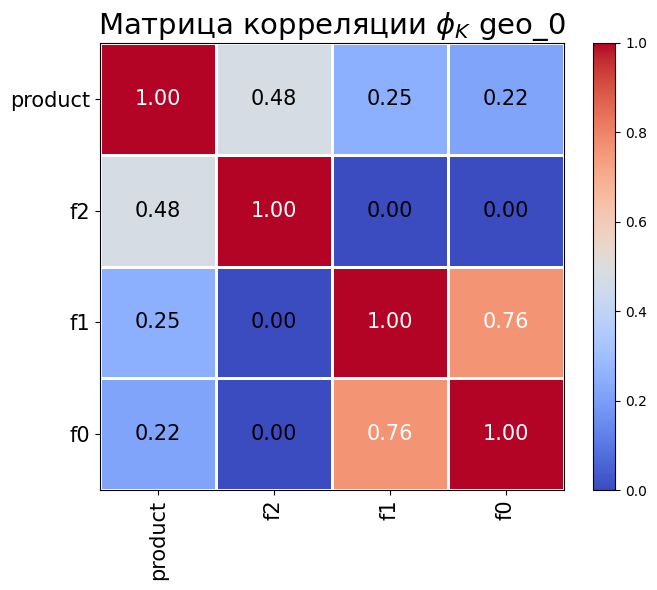

Размер матрицы (4, 4)


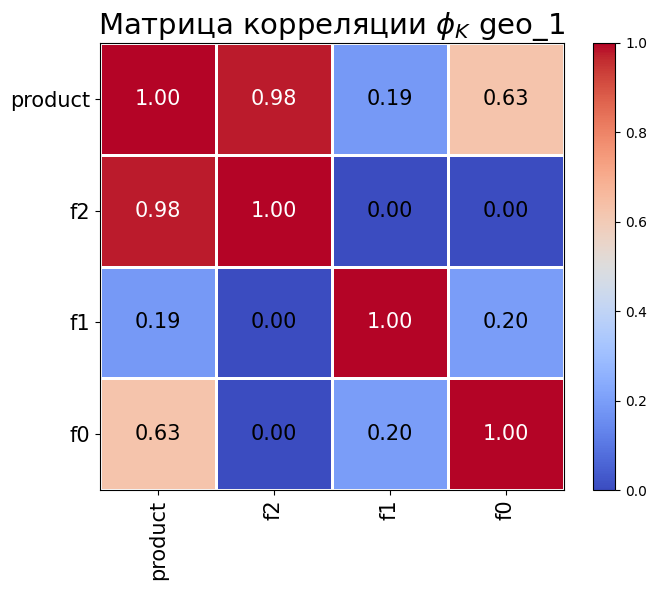

Размер матрицы (4, 4)


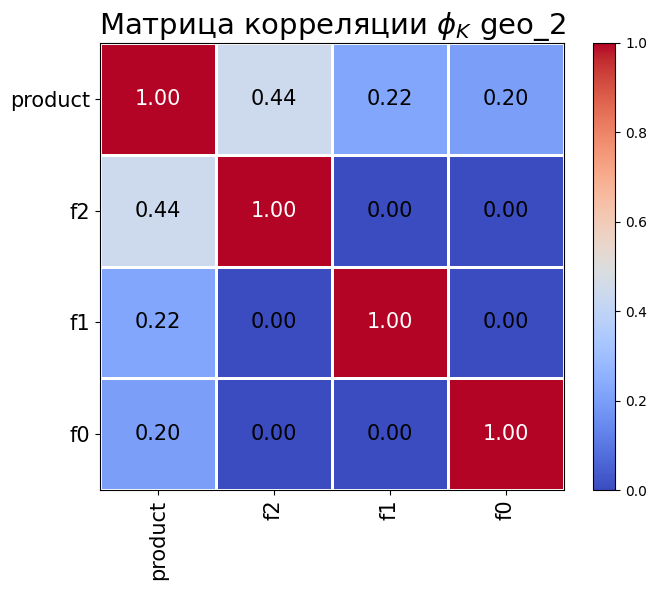

In [34]:
matrix_corr_no_cat(
    [geo_data_0, geo_data_1, geo_data_2], 
    ['f0', 'f1', 'f2', 'product'],
    geo_names
)

<div class="alert alert-block alert-warning">
<b>Комментарий студента 2:</b>
    
Точно, совсем забыл про `plt.show()`

После построение корреляционной матрицы входящих признаков к целевому можно сделать следующие выводы:
- теплые тона говорят о сильной линейной зависимости, а холодные — о слабой;
- корреляция между целевым и остальными достаточно слабая, кроме `geo_data_1` и `f0`;
- присутствует мультиколлинеарность в фрейме `geo_data_1` между целевым и `f2`, так как порог для подтверждения 0.9-0.95 Исключим данный признак из обучения модели.

### Промежуточный вывод

В шаге исследовательского анализа данных получили следующий результат:

- таблицы соответствуют техническому описанию;
- присутствуют явные дубликаты;
- присутствуют нулевые значения;
- присутствуют выбросы в каждом фрейме;
- не все признаки имеют нормальное распределение;
- присутствует линейная корреляция в `geo_data_0` между `product -> f2`;
- присутствует линейная корреляция в `geo_data_1` между `product -> f2`;
- присутствует линейная корреляция в `geo_data_2` между `product -> f2`;
- остальные признаки без явной корреляции;
- корреляция между целевым и остальными достаточно слабая, кроме `geo_data_1` и `f0`;
- присутствует мультиколлинеарность в фрейме `geo_data_1` между целевым и `f2`, так как порог для подтверждения 0.9-0.95.


<div class="alert alert-block alert-success">
<b>Успех:</b> Данные загружены и осмотрены корректно. Радует, что распределения и корреляции были визуализированы!
</div>

# Обучим и проверим модель для каждого региона

## Разделим данные на обучающую и валидационную выборки в соотношении 75:25

Подготовку признаков выполним в пайплайне, дополнив шагами предобработки. При кодировании учтем особенности признаков для выбора моделей.

In [35]:
# функция для удаления дубликатов
def remove_duplicates(data):
    return (
        data
        .drop_duplicates(subset=['id'], keep='first')
        .reset_index(drop=True)
    )

# трансформер для обработки выбросов
class OutlierRemover(BaseEstimator, TransformerMixin):
    def __init__(self, threshold=1.5):
        self.threshold = threshold
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        # только числовые столбцы
        numerical_cols = X.select_dtypes(include=[np.number])
        
        # метод IQR для обнаружения выбросов
        Q1 = np.percentile(numerical_cols, 25, axis=0)
        Q3 = np.percentile(numerical_cols, 75, axis=0)
        IQR = Q3 - Q1
        
        # убираем выбросы
        mask = (
            ~((numerical_cols < (Q1 - self.threshold * IQR)) | 
              (numerical_cols > (Q3 + self.threshold * IQR)))
        )
        filtered_data = numerical_cols[mask]

        # возвращаем только обработанные элементы
        return pd.concat([filtered_data, X.drop(numerical_cols.columns, axis=1)], axis=1).dropna()

In [36]:
# создадим Pipeline предобработки
pre_pipe = Pipeline(
    [
        ('remove_duplicates', FunctionTransformer(remove_duplicates, validate=False))
    ]
)

In [37]:
# обучим пайплайн и трансформируем фреймы
geo_data_0, geo_data_1, geo_data_2 = (
    [pre_pipe.fit_transform(data) for data in [geo_data_0, geo_data_1, geo_data_2]]
)

In [38]:
# создадим Pipeline
RANDOM_STATE = 42
TEST_SIZE = 0.25

# создаем тренировочную и валидационную выборки
geo_0_future_train, geo_0_future_valid, geo_0_target_train, geo_0_target_valid = (
    train_test_split(
        geo_data_0
        .drop(
            [
                'id',
                'product'
            ],
            axis=1
            ),
        geo_data_0['product'],
        test_size = TEST_SIZE,
        random_state = RANDOM_STATE,
        )
)

geo_1_future_train, geo_1_future_valid, geo_1_target_train, geo_1_target_valid = (
    train_test_split(
        geo_data_1
        .drop(
            [
                'id',
                'product'
            ],
            axis=1
            ),
        geo_data_1['product'],
        test_size = TEST_SIZE,
        random_state = RANDOM_STATE,
        )
)

geo_2_future_train, geo_2_future_valid, geo_2_target_train, geo_2_target_valid = (
    train_test_split(
        geo_data_2
        .drop(
            [
                'id',
                'product'
            ],
            axis=1
            ),
        geo_data_2['product'],
        test_size = TEST_SIZE,
        random_state = RANDOM_STATE,
        )
)

num_columns = [
    'f0',
    'f1',
    'f2'
]

# пайплайн подготовки признаков из списка num_columns
num_pipe = Pipeline(
    [
        (
            'simpleImputer_num_before', 
            SimpleImputer(missing_values=np.nan, strategy='mean')
        ),

        (
            'num', 
            MinMaxScaler()
        ),
        
        (
            'simpleImputer_num_after',
            SimpleImputer(missing_values=np.nan, strategy='mean')
        ),
    ]
    )

# код для пайплайна подготовки данных
data_preprocessor = ColumnTransformer(
    [
        ('num', num_pipe, num_columns)
    ],
    remainder='passthrough'
)

# итоговый пайплайн: подготовка данных и модель
pipe_final = Pipeline(
    [
        ('preprocessor', data_preprocessor),
        
        # используем смесь андерсэмплинга с оверсэмплингом SMOTETomek
        ('models', SMOTETomek(random_state=RANDOM_STATE))
    ]
)

## Обучение и предсказания

Для обучения модели подходит только линейная регрессия (остальные — недостаточно предсказуемые)

In [39]:
def lin_model(future_train, target_train, future_valid):
    # обучим пайплайн на тренировочных данных
    pipe_final.fit(future_train, target_train)

    # преобразуем тренировочную и тестовую выборку
    future_train = pipe_final.named_steps['preprocessor'].transform(future_train)
    future_valid = pipe_final.named_steps['preprocessor'].transform(future_valid)
    
    # выбор модели
    model = LinearRegression(n_jobs=-1, fit_intercept=True)
    # обучение
    model.fit(future_train, target_train)
    # предсказание
    y_pred = model.predict(future_valid)
    return y_pred

### geo_data_0

In [40]:
y_pred_geo_0 = lin_model(
    geo_0_future_train, 
    geo_0_target_train,
    geo_0_future_valid
)

### geo_data_1

In [41]:
y_pred_geo_1 = lin_model(
    geo_1_future_train, 
    geo_1_target_train,
    geo_1_future_valid
)

### geo_data_2

In [42]:
y_pred_geo_2 = lin_model(
    geo_2_future_train, 
    geo_2_target_train,
    geo_2_future_valid
)

## Предсказания и правильные ответы

In [43]:
# массивы и предсказания моделей
geo_targets = [geo_0_target_valid, geo_1_target_valid, geo_2_target_valid]
y_preds = [y_pred_geo_0, y_pred_geo_1, y_pred_geo_2]

# cписок результатов
results = []

# вычисление средних значений и RMSE
for geo_target, y_pred, geo_name in zip(geo_targets, y_preds, geo_names):
    mean_value = round(np.mean(y_pred), 2)
    rmse_value = round(mean_squared_error(geo_target, y_pred, squared=False), 1)
    results.append({'geo': geo_name, 'mean': mean_value, 'RMSE': rmse_value})

# в DataFrame
results = pd.DataFrame(results).set_index('geo')
display(results)

,mean,RMSE
geo,,
geo_0,92.61,37.7
geo_1,68.58,0.9
geo_2,94.93,40.1


## Анализ результатов

По итогу шага №2 получили лучшее предсказание среднего запаса сырья в 94.93 тыс. баррелей и среднеквадратичнаую ошибку у geo_data_2.

# Расчёт прибыли

## Ключевые значения

In [44]:
INCOME_PRODUCT = 450_000
GEO_INTELLIGENCE= 500
REGION_POINT = 200
REVENU = 10**10

## Достаточный объём сырья для безубыточной разработки скважины. Сравнени с средним запасом в каждом регионе.

In [45]:
break_even_dev = round(REVENU / (INCOME_PRODUCT * REGION_POINT), 2)
print(f'Минимальный объем сырья для безубыточной разработки {break_even_dev} тыс. баррелей')

Минимальный объем сырья для безубыточной разработки 111.11 тыс. баррелей


С учетом результатов моделирования и расчетом безубыточной разработки представленные регионы не подходят для разработки, 
так как средний объем добычи лучшего региона **ниже необходимого порога на 16 тыс. баррелей**

# Риски и прибыль для регионов

## Bootstrap для распределения прибыли

Напишем алгоритм для получения необходимых результатов

In [46]:
# расчет выручки
def revenue_bootstrap(target, pred):
    pred = (pd
        .Series(pred)
        .sort_values(ascending=False) # сортируем, так как после предсказания данные перемешаны
        .iloc[:REGION_POINT] # индексация по позиционным индексам в нужном количистве
        .index # сохраняем индексы
    )
    # фильтруем строки по нужным индексам
    selected = target.iloc[pred].sum() 
    return INCOME_PRODUCT * selected - REVENU

def bootstrap_geo(targets, preds):
    state = np.random.RandomState(12345)
    # список для  результатов
    result = []  

    # цикл доверительного интервала и бутстрапа
    for target, pred, name in zip(targets, preds, geo_names):
        # сбрасываем индексы
        target = target.reset_index(drop=True)
        
        # список для  результатов
        values = []

        # цикл бутстрапа
        for i in range(1000):
            # выборка скважин в соответствии с заданием
            target_subsample = target.sample(GEO_INTELLIGENCE, replace=True, random_state=state)
            # выборка предсказаний в соответствии с заданием
            pred_subsample = pred[target_subsample.index]
            # расчет 
            values.append(revenue_bootstrap(target_subsample, pred_subsample))

        values = pd.Series(values)
        mean_revenue = values.mean()
        # расчет доверительного интервала
        lower = values.quantile(0.025) / 1_000_000
        upper = values.quantile(0.975) / 1_000_000
        confidence_interval = (round(lower, 3), round(upper, 3))
        risk = (values < 0).mean() * 100

        # добавляем результаты в словарь
        result.append({
            'geo': name,
            'mean_revenue, mln': round(mean_revenue / 1_000_000, 3),
            'confidence_interval, mln ': confidence_interval, 
            'risk, %': risk
        })

    final_table = pd.DataFrame(result).set_index('geo')
    return final_table

## Средняя прибыль, 95%-й доверительный интервал и риск отрицательной прибыли(убыток).

In [47]:
display(bootstrap_geo(geo_targets, y_preds))

,"mean_revenue, mln","confidence_interval, mln","risk, %"
geo,,,
geo_0,417.354,"(-96.262, 933.493)",5.9
geo_1,435.440,"(25.316, 832.288)",1.9
geo_2,355.875,"(-208.545, 869.925)",9.8


На основе моделирования и подсчета прибыли определили лучший регион для разработки, где добыча принесёт наибольшую прибыль
с учетом порога риска в 2.5% по техническому заданию - **geo_1**

# Вывод и регион для разработки скважин.

Представлены пробы нефти в нескольких регионах. Характеристики известны, проанализировали возможную прибыль и риски техникой Bootstrap. На основе моделирования определили регион с максимальной суммарной прибылью отобранных скважин, где добыча принесёт наибольшую прибыль - **geo_1**

На этапе **Исследовательский анализ данных** выяснили следующее:
- таблицы соответствуют техническому описанию;
- присутствуют явные дубликаты;
- присутствуют нулевые значения - выбросы в столбце **product** в каждом фрейме;
- не все признаки имеют нормальное распределение;
- присутствует линейная корреляция в `geo_data_0` между `product -> f2`;
- присутствует линейная корреляция в `geo_data_1` между `product -> f2`;
- присутствует линейная корреляция в `geo_data_2` между `product -> f2`;
- остальные признаки без явной корреляции;
- корреляция между целевым и остальными достаточно слабая, кроме `geo_data_1` и `f0`;
- присутствует мультиколлинеарность в фрейме `geo_data_1` между целевым и `f2`, так как порог для подтверждения 0.9-0.95;
- по итогу шага №2 получили лучшее предсказание среднего запаса сырья в 95.11 тыс. баррелей и среднеквадратичную ошибку  39.9 у **geo_data_2**;
- минимальный объем сырья для безубыточной разработки 111.11 тыс. баррелей;

На основе моделирования и подсчета прибыли лучший регион для разработки, где добыча принесёт наибольшую прибыль - **geo_1**